In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import pyflux as pf


In [2]:
os.chdir('..')
X = pickle.load(open("data/interest_rate_data", "rb" ) )

In [3]:
# cannot use train/test split on this because it is time series
total_obs = len(X)
train_int = int(round(total_obs*.7, 0))
cv_int = int(round(total_obs*.85, 0))

X_train = X[0:train_int]
X_cv = X[train_int:cv_int]
X_test = X[cv_int:]


In [36]:
def build_ARIMA_model(X, ar, ma, diff_ord, target):

    model = pf.ARIMA(data=X, ar=4, ma=4, integ = diff_ord, target=target, family = pf.Normal())

    # Estimate the latent variables with a maximum likelihood estimation
    model.fit("MLE")
    #x.summary()
    pred = model.predict(h=1)
    last_rate = X['10 YR'][-1]
    this_shock = pred['Differenced 10 YR'].iloc[0]
    next_rate = last_rate + this_shock

    return next_rate

In [37]:
def update_cv_data(X_train, X_cv, i):

    temp = X_cv[0:i]
    frames = [X_train, temp]
    X_this_cv = pd.concat(frames)

    return X_this_cv

In [38]:
def create_cv_forecasts(X_train, X_cv, dict_params):
    cv_len = len(X_cv)
    forecasts = np.zeros(shape=[cv_len,1])
    ar = dict_params['ar']
    ma = dict_params['ma']
    diff_ord = dict_params['diff_ord']
    this_col = dict_params['target']
    for i in range(cv_len):
        print(i)
        this_X = update_cv_data(X_train, X_cv, i)
        forecasts[i] = build_ARIMA_model(this_X, ar, ma, diff_ord, this_col)
    return forecasts

In [39]:
fcsts = create_cv_forecasts(X_train, X_cv, dict_params)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
dict_params = {'ar':1, 'ma': 1, "diff_ord": 1, 'target':'10 YR'}

In [13]:
c = 10
arr1 = np.zeros(shape=(c,1))
arr1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [26]:
dict_params['target']

'10 YR'

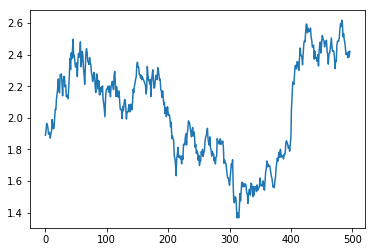

In [40]:
plt.plot(fcsts)

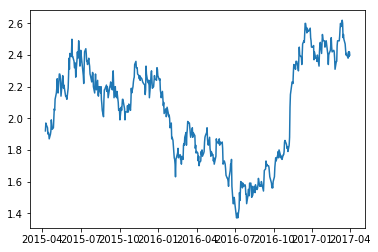

In [35]:
plt.plot(X_cv['10 YR'])

In [51]:
#fcsts.shape
#len(X_cv['10 YR'])
X_cv['fcst'] = fcsts

In [52]:
X_cv['delta'] = X_cv['10 YR']- X_cv['fcst']


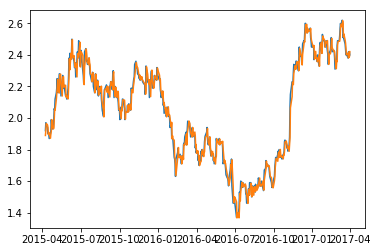

In [53]:
plt.plot(X_cv['10 YR'])
plt.plot(X_cv['fcst'])

(array([ 2.,  0.,  1.,  7., 10., 24., 49., 55., 86., 76., 59., 57., 34.,
        17., 11.,  7.,  0.,  1.,  0.,  1.]),
 array([-0.16501693, -0.14706017, -0.12910341, -0.11114666, -0.0931899 ,
        -0.07523314, -0.05727638, -0.03931962, -0.02136287, -0.00340611,
         0.01455065,  0.03250741,  0.05046417,  0.06842092,  0.08637768,
         0.10433444,  0.1222912 ,  0.14024796,  0.15820471,  0.17616147,
         0.19411823]),
 <a list of 20 Patch objects>)

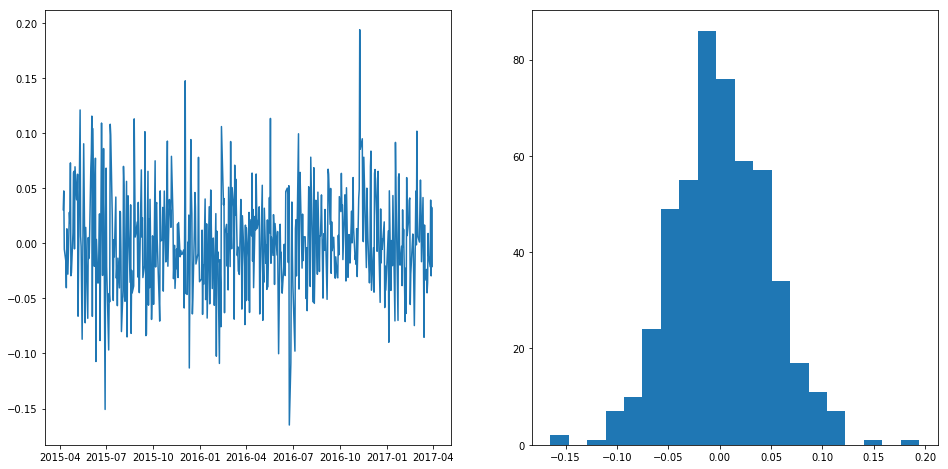

In [66]:
fig, axs = plt.subplots(1,2, figsize = (16,8))

axs[0].plot(X_cv['delta'])
axs[1].hist(X_cv['delta'], bins = 20)

In [67]:
X_cv['delta'].describe()

count    497.000000
mean       0.002061
std        0.047249
min       -0.165017
25%       -0.029487
50%        0.000623
75%        0.033007
max        0.194118
Name: delta, dtype: float64

In [68]:
act_delta = X_cv['delta'].iloc[1:] - X_cv['delta'][0:-2]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 494.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

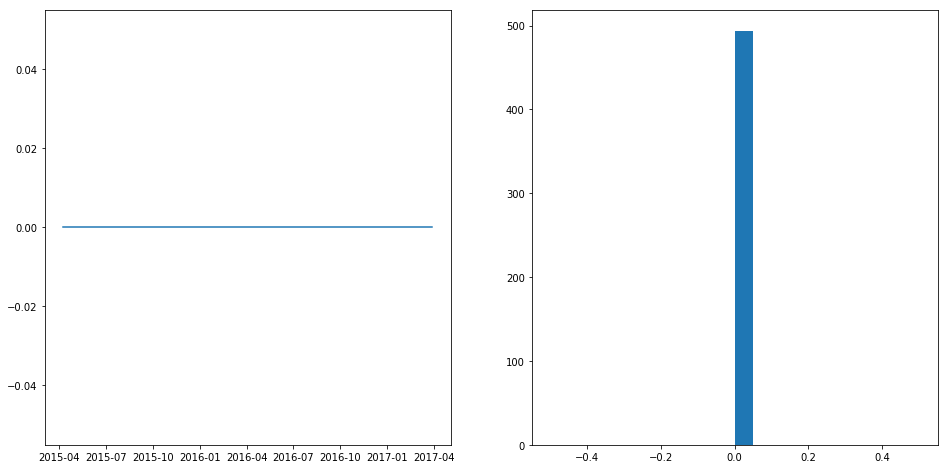

In [69]:
fig, axs = plt.subplots(1,2, figsize = (16,8))

axs[0].plot(act_delta)
axs[1].hist(act_delta, bins = 20)

In [70]:
act_delta

Date
2015-04-08    NaN
2015-04-09    0.0
2015-04-10    0.0
2015-04-13    0.0
2015-04-14    0.0
2015-04-15    0.0
2015-04-16    0.0
2015-04-17    0.0
2015-04-20    0.0
2015-04-21    0.0
2015-04-22    0.0
2015-04-23    0.0
2015-04-24    0.0
2015-04-27    0.0
2015-04-28    0.0
2015-04-29    0.0
2015-04-30    0.0
2015-05-01    0.0
2015-05-04    0.0
2015-05-05    0.0
2015-05-06    0.0
2015-05-07    0.0
2015-05-08    0.0
2015-05-11    0.0
2015-05-12    0.0
2015-05-13    0.0
2015-05-14    0.0
2015-05-15    0.0
2015-05-18    0.0
2015-05-19    0.0
             ... 
2017-02-17    0.0
2017-02-21    0.0
2017-02-22    0.0
2017-02-23    0.0
2017-02-24    0.0
2017-02-27    0.0
2017-02-28    0.0
2017-03-01    0.0
2017-03-02    0.0
2017-03-03    0.0
2017-03-06    0.0
2017-03-07    0.0
2017-03-08    0.0
2017-03-09    0.0
2017-03-10    0.0
2017-03-13    0.0
2017-03-14    0.0
2017-03-15    0.0
2017-03-16    0.0
2017-03-17    0.0
2017-03-20    0.0
2017-03-21    0.0
2017-03-22    0.0
2017-03-23    0.0
2017-

In [71]:
aa = X_cv['delta'].iloc[1:]

In [72]:
len(aa)

496

In [73]:
ab = X_cv['delta'].iloc[0:-1]
len(ab)

496

In [74]:
aa[0:5]

Date
2015-04-09    0.047637
2015-04-10   -0.005262
2015-04-13   -0.016140
2015-04-14   -0.040330
2015-04-15    0.013228
Name: delta, dtype: float64

In [75]:
ab[0:5]

Date
2015-04-08    0.030541
2015-04-09    0.047637
2015-04-10   -0.005262
2015-04-13   -0.016140
2015-04-14   -0.040330
Name: delta, dtype: float64

In [76]:
act_delta = aa - ab
act_delta

Date
2015-04-08    NaN
2015-04-09    0.0
2015-04-10    0.0
2015-04-13    0.0
2015-04-14    0.0
2015-04-15    0.0
2015-04-16    0.0
2015-04-17    0.0
2015-04-20    0.0
2015-04-21    0.0
2015-04-22    0.0
2015-04-23    0.0
2015-04-24    0.0
2015-04-27    0.0
2015-04-28    0.0
2015-04-29    0.0
2015-04-30    0.0
2015-05-01    0.0
2015-05-04    0.0
2015-05-05    0.0
2015-05-06    0.0
2015-05-07    0.0
2015-05-08    0.0
2015-05-11    0.0
2015-05-12    0.0
2015-05-13    0.0
2015-05-14    0.0
2015-05-15    0.0
2015-05-18    0.0
2015-05-19    0.0
             ... 
2017-02-17    0.0
2017-02-21    0.0
2017-02-22    0.0
2017-02-23    0.0
2017-02-24    0.0
2017-02-27    0.0
2017-02-28    0.0
2017-03-01    0.0
2017-03-02    0.0
2017-03-03    0.0
2017-03-06    0.0
2017-03-07    0.0
2017-03-08    0.0
2017-03-09    0.0
2017-03-10    0.0
2017-03-13    0.0
2017-03-14    0.0
2017-03-15    0.0
2017-03-16    0.0
2017-03-17    0.0
2017-03-20    0.0
2017-03-21    0.0
2017-03-22    0.0
2017-03-23    0.0
2017-

In [77]:
diff = X_cv.diff()

In [79]:
diff.tail()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,fcst,delta
Date,,,,,,,,,,
2017-03-27,0.00,0.02,0.00,0.01,-0.01,0.00,-0.02,-0.02,-0.010103,-0.009897
2017-03-28,0.00,0.01,0.03,0.03,0.05,0.04,0.05,0.04,-0.020529,0.060529
2017-03-29,0.00,0.00,0.01,-0.04,-0.03,-0.04,-0.04,-0.03,0.038833,-0.068833
2017-03-30,0.00,-0.01,-0.01,0.02,0.02,0.03,0.04,0.03,-0.032215,0.062215
2017-03-31,-0.02,0.00,0.00,-0.01,-0.05,-0.03,-0.03,-0.02,0.033693,-0.053693


(array([ 2.,  1.,  2.,  0.,  7., 13., 25., 35., 61., 73., 62., 54., 52.,
        44., 26., 19.,  9.,  5.,  4.,  2.]),
 array([-0.23700343, -0.21477713, -0.19255082, -0.17032452, -0.14809822,
        -0.12587192, -0.10364562, -0.08141931, -0.05919301, -0.03696671,
        -0.01474041,  0.0074859 ,  0.0297122 ,  0.0519385 ,  0.0741648 ,
         0.0963911 ,  0.11861741,  0.14084371,  0.16307001,  0.18529631,
         0.20752262]),
 <a list of 20 Patch objects>)

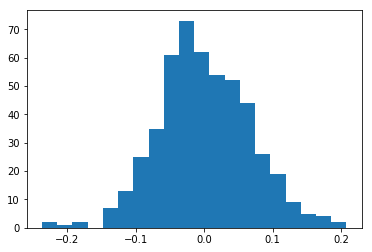

In [81]:
plt.hist(diff['delta'], bins = 20)

In [82]:
diff['delta'].describe()

count    496.000000
mean      -0.000104
std        0.067411
min       -0.237003
25%       -0.045565
50%       -0.002281
75%        0.045459
max        0.207523
Name: delta, dtype: float64

In [83]:
whos


Variable              Type         Data/Info
--------------------------------------------
X                     DataFrame                3 MO  6 MO  1<...>\n[3313 rows x 8 columns]
X_cv                  DataFrame                3 MO  6 MO  1<...>\n[497 rows x 10 columns]
X_test                DataFrame                3 MO  6 MO  1<...>n\n[497 rows x 8 columns]
X_train               DataFrame                3 MO  6 MO  1<...>\n[2319 rows x 8 columns]
aa                    Series       Date\n2015-04-09    0.047<...>ngth: 496, dtype: float64
ab                    Series       Date\n2015-04-08    0.030<...>ngth: 496, dtype: float64
act_delta             Series       Date\n2015-04-08    NaN\n<...>ngth: 497, dtype: float64
arr1                  ndarray      10x1: 10 elems, type `float64`, 80 bytes
axs                   ndarray      2: 2 elems, type `object`, 16 bytes
build_ARIMA_model     function     <function build_ARIMA_model at 0x1120e91e0>
c                     int          10
create_cv

In [84]:
dict_params


{'ar': 1, 'ma': 1, 'diff_ord': 1, 'target': '10 YR'}

In [85]:
my_dict = {'a': 'text a', 'b':1, "c":0}
print(my_dict)


{'a': 'text a', 'b': 1, 'c': 0}


In [88]:
my_dict['c'] = 'foo'

In [89]:
my_dict

{'a': 'text a', 'b': 1, 'c': 'foo'}

In [93]:
model_list = []

this_name = 'Normal ARIMA(1,1,1)'
hyper_params= {'ar':1, 'ma': 1, "diff_ord": 1, 'target':'10 YR'}
forecast = 0

model_inputs = {'model_type': 'ARIMA',
                'name': this_name,
                'target_class': 'rates',
                'hyper_params': hyper_params,
                'foreacst': forecast}

model_list.append(model_inputs)


In [94]:
model_list


[{'model_type': 'ARIMA',
  'name': 'Normal ARIMA(1,1,1)',
  'target_class': 'rates',
  'hyper_params': {'ar': 1, 'ma': 1, 'diff_ord': 1, 'target': '10 YR'},
  'foreacst': 0}]

In [95]:
this_name = 'Normal ARIMA(2,1,2)'
hyper_params= {'ar':2, 'ma': 2, "diff_ord": 1, 'target':'10 YR'}
model_inputs = {'model_type': 'ARIMA'
                'name': this_name,
                'target_class': 'rates'
                'hyper_params': hyper_params,
                'foreacst': forecasts}
forecast = 0
model_list.append(model_inputs)


SyntaxError: invalid syntax (<ipython-input-95-2b6c830c8a91>, line 4)

In [97]:
this_name = 'Normal ARIMA(2,1,2)'
hyper_params= {'ar':2, 'ma': 2, "diff_ord": 1, 'target':'10 YR'}
forecast = 0
model_inputs = {'model_type': 'ARIMA',
                'name': this_name,
                'target_class': 'rates',
                'hyper_params': hyper_params,
                'foreacst': forecast}
model_list.append(model_inputs)


In [98]:
model_list


[{'model_type': 'ARIMA',
  'name': 'Normal ARIMA(1,1,1)',
  'target_class': 'rates',
  'hyper_params': {'ar': 1, 'ma': 1, 'diff_ord': 1, 'target': '10 YR'},
  'foreacst': 0},
 {'model_type': 'ARIMA',
  'name': 'Normal ARIMA(2,1,2)',
  'target_class': 'rates',
  'hyper_params': {'ar': 2, 'ma': 2, 'diff_ord': 1, 'target': '10 YR'},
  'foreacst': 0}]

In [101]:
these_fcsts = aa


In [103]:
for i in range(len(model_list)):
    print(i)
    model_list[i]['forecast']= aa

0
1


In [104]:
model_list

[{'model_type': 'ARIMA',
  'name': 'Normal ARIMA(1,1,1)',
  'target_class': 'rates',
  'hyper_params': {'ar': 1, 'ma': 1, 'diff_ord': 1, 'target': '10 YR'},
  'foreacst': 0,
  'forecast': Date
  2015-04-09    0.047637
  2015-04-10   -0.005262
  2015-04-13   -0.016140
  2015-04-14   -0.040330
  2015-04-15    0.013228
  2015-04-16   -0.008964
  2015-04-17   -0.027948
  2015-04-20    0.028204
  2015-04-21    0.018476
  2015-04-22    0.073111
  2015-04-23   -0.029396
  2015-04-24   -0.026527
  2015-04-27    0.009682
  2015-04-28    0.064180
  2015-04-29    0.065492
  2015-04-30   -0.005018
  2015-05-01    0.069583
  2015-05-04    0.040045
  2015-05-05    0.039392
  2015-05-06    0.062832
  2015-05-07   -0.066157
  2015-05-08   -0.014178
  2015-05-11    0.121198
  2015-05-12    0.006654
  2015-05-13   -0.003068
  2015-05-14   -0.048269
  2015-05-15   -0.087089
  2015-05-18    0.090482
  2015-05-19    0.043204
  2015-05-20   -0.001950
                  ...   
  2017-02-17   -0.027781
  2017-

In [105]:
my_list = [1, 'b', 'c', 12]
for item in my_list:
    print(item)

1
b
c
12


In [122]:

def cross_validate_models(model_list, X_train, X_cv):
    '''
    Building a overlaying function that handles the cross validation

    Will take as an input model_list that includes the model type
    and all of the hyper parameters of the model

    INPUTS:
        X_train -   the dataframe containing the training dataset
        X_cv -      the dataframe containing the cross_val dataset
        model_list  A dictionary containing the hyper parameters
                     of the model

    OUTPUTS
        The forecast of the model (one day interest rate forecast) will be stored
        in the model_list['foreacst'] section

    'model_type'    {'Gaussian', 'ARIMA', 'ARIMAX'}
    'name'          name given to model for charting purposes
    'target_class'  {'rates', 'forwards', 'cc_forwards'}
    'hyper_parms'    A dictoinary containing the hyperparmeters of the model
    'forecast'      A zero, initially that get populated with the daily forecasts over CV period

    '''
    # setting up the initial arima model
    for i, item in enumerate(model_list):
        
        # Making sure we use the correct interest rate transformation
        if item['target_class']=='rates':
            print('This one uses rates')

        elif item['target_class']=='forwards':
            print('This model uses forwards')
        elif item['target_class']=='cc_forwards':
            print("This model uses continuously compounded forwards")

        if item['model_type']== 'ARIMA':
            model_list[i]['forecast'] = create_cv_forecasts(X_train, X_cv, item['hyper_params'])

    return model_list

In [123]:
cross_validate_models(model_list, X_train, X_cv)

This one uses rates
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
27

[{'model_type': 'ARIMA',
  'name': 'Normal ARIMA(1,1,1)',
  'target_class': 'rates',
  'hyper_params': {'ar': 1, 'ma': 1, 'diff_ord': 1, 'target': '10 YR'},
  'foreacst': 0,
  'forecast': array([[1.88945935],
         [1.92236339],
         [1.96526162],
         [1.9561398 ],
         [1.94033003],
         [1.89677156],
         [1.90896385],
         [1.89794829],
         [1.87179618],
         [1.90152428],
         [1.91688906],
         [1.98939588],
         [1.95652683],
         [1.93031773],
         [1.93582044],
         [1.99450771],
         [2.05501808],
         [2.05041723],
         [2.11995498],
         [2.15060758],
         [2.18716812],
         [2.24615749],
         [2.17417842],
         [2.1588018 ],
         [2.27334552],
         [2.27306782],
         [2.27826928],
         [2.22708946],
         [2.13951802],
         [2.22679598],
         [2.26194951],
         [2.26214509],
         [2.19550838],
         [2.20806523],
         [2.13473431],
         

In [121]:
for idx, item in enumerate(model_list):
    print(item['target_class'])

rates
rates


In [127]:
pickle_out = open('test_ARIMA', 'wb')
pickle.dump(model_list, pickle_out)
pickle_out.close()

In [125]:
cd results


/Users/davidsmith/Documents/Galvanize/Capstone/results


In [128]:
whos


Variable                Type              Data/Info
---------------------------------------------------
X                       DataFrame                     3 MO  6 MO  1<...>\n[3313 rows x 8 columns]
X_cv                    DataFrame                     3 MO  6 MO  1<...>\n[497 rows x 10 columns]
X_test                  DataFrame                     3 MO  6 MO  1<...>n\n[497 rows x 8 columns]
X_train                 DataFrame                     3 MO  6 MO  1<...>\n[2319 rows x 8 columns]
aa                      Series            Date\n2015-04-09    0.047<...>ngth: 496, dtype: float64
ab                      Series            Date\n2015-04-08    0.030<...>ngth: 496, dtype: float64
act_delta               Series            Date\n2015-04-08    NaN\n<...>ngth: 497, dtype: float64
arr1                    ndarray           10x1: 10 elems, type `float64`, 80 bytes
axs                     ndarray           2: 2 elems, type `object`, 16 bytes
build_ARIMA_model       function          <functi

In [129]:
terms = np.array([.03, .5, 1.0, 2.0, 3.0, 5.0, 7.0, 10])


In [ ]:
#t_bills = [0:2]
#